In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pd.options.display.max_columns = 999
sns.set_style('white')

In [2]:
df = pd.read_csv('census_income_2019.csv', compression = 'zip')

In [3]:
df.head()

,PWGTP,WGTP,PINCP,WKHP,WAGP,AGEP,FER,DIS,COW,CPLT,ADJINC,CIT,POBP,PARTNER,SEX,RAC1P,SCHL,OCCP,NAICSP,SERIALNO,SPORDER
0,71,0,63000,80,63000,35,0,2,1,0,1.010145,1,18,-1,1,1,17,6250,23,2019GQ0000001,1
1,67,0,0,0,0,25,0,2,0,0,1.010145,1,48,-1,1,1,12,9,-1,2019GQ0000004,1
2,24,0,2000,15,2000,21,2,2,2,0,1.010145,5,229,-1,2,6,19,4740,611M1,2019GQ0000007,1
3,52,0,0,0,0,49,0,2,1,0,1.010145,1,6,-1,1,1,21,110,722Z,2019GQ0000010,1
4,28,0,6000,15,6000,18,2,2,1,0,1.010145,1,6,-1,2,1,16,4110,722Z,2019GQ0000013,1


In [4]:
df.shape

(3239553, 21)

In [5]:
df.head()

,PWGTP,WGTP,PINCP,WKHP,WAGP,AGEP,FER,DIS,COW,CPLT,ADJINC,CIT,POBP,PARTNER,SEX,RAC1P,SCHL,OCCP,NAICSP,SERIALNO,SPORDER
0,71,0,63000,80,63000,35,0,2,1,0,1.010145,1,18,-1,1,1,17,6250,23,2019GQ0000001,1
1,67,0,0,0,0,25,0,2,0,0,1.010145,1,48,-1,1,1,12,9,-1,2019GQ0000004,1
2,24,0,2000,15,2000,21,2,2,2,0,1.010145,5,229,-1,2,6,19,4740,611M1,2019GQ0000007,1
3,52,0,0,0,0,49,0,2,1,0,1.010145,1,6,-1,1,1,21,110,722Z,2019GQ0000010,1
4,28,0,6000,15,6000,18,2,2,1,0,1.010145,1,6,-1,2,1,16,4110,722Z,2019GQ0000013,1


In [6]:
df.shape

(3239553, 21)

In [8]:
org_vars = """PINCP
WAGP
INTP
ADJINC
PWGTP
OCCP
NAICSP
WKHP
AGEP
SEX
FER
CPLT
PARTNER
COW
RAC1P
POBP
CIT
SCHL
DIS
SERIALNO
SPORDER
WAOB""".split("\n")

In [9]:
uptd_vars = """INCOME
SALARY
INTEREST_DIV
ADJINC
FNLWGT
OCCUPATION
WORK_INDUSTRY
WKLY_HRS
AGE
SEX
MOM
COUPLE
PARTNER
WORK_CLASS
RACE
POB_DETAIL
CITIZENSHIP
EDUCATION
DIS
SERIALNO
PERSON_NO
POB_WORLD""".split("\n")

In [10]:
vars_dict = dict(zip(org_vars, uptd_vars))

In [11]:
vars_dict

{'PINCP': 'INCOME',
 'WAGP': 'SALARY',
 'INTP': 'INTEREST_DIV',
 'ADJINC': 'ADJINC',
 'PWGTP': 'FNLWGT',
 'OCCP': 'OCCUPATION',
 'NAICSP': 'WORK_INDUSTRY',
 'WKHP': 'WKLY_HRS',
 'AGEP': 'AGE',
 'SEX': 'SEX',
 'FER': 'MOM',
 'CPLT': 'COUPLE',
 'PARTNER': 'PARTNER',
 'COW': 'WORK_CLASS',
 'RAC1P': 'RACE',
 'POBP': 'POB_DETAIL',
 'CIT': 'CITIZENSHIP',
 'SCHL': 'EDUCATION',
 'DIS': 'DIS',
 'SERIALNO': 'SERIALNO',
 'SPORDER': 'PERSON_NO',
 'WAOB': 'POB_WORLD'}

In [49]:
df.dtypes

FNLWGT             int64
WGTP               int64
INCOME             int64
WKLY_HRS           int64
SALARY             int64
AGE                int64
MOM                int64
DIS                int64
WORK_CLASS         int64
COUPLE             int64
ADJINC           float64
CITIZENSHIP        int64
POB_DETAIL         int64
PARTNER            int64
SEX                int64
RACE               int64
EDUCATION          int64
OCCUPATION         int64
WORK_INDUSTRY     object
SERIALNO          object
PERSON_NO          int64
TARGET            object
dtype: object

In [12]:
df = df.rename(columns=vars_dict)

In [13]:
df.head()

,FNLWGT,WGTP,INCOME,WKLY_HRS,SALARY,AGE,MOM,DIS,WORK_CLASS,COUPLE,ADJINC,CITIZENSHIP,POB_DETAIL,PARTNER,SEX,RACE,EDUCATION,OCCUPATION,WORK_INDUSTRY,SERIALNO,PERSON_NO
0,71,0,63000,80,63000,35,0,2,1,0,1.010145,1,18,-1,1,1,17,6250,23,2019GQ0000001,1
1,67,0,0,0,0,25,0,2,0,0,1.010145,1,48,-1,1,1,12,9,-1,2019GQ0000004,1
2,24,0,2000,15,2000,21,2,2,2,0,1.010145,5,229,-1,2,6,19,4740,611M1,2019GQ0000007,1
3,52,0,0,0,0,49,0,2,1,0,1.010145,1,6,-1,1,1,21,110,722Z,2019GQ0000010,1
4,28,0,6000,15,6000,18,2,2,1,0,1.010145,1,6,-1,2,1,16,4110,722Z,2019GQ0000013,1


In [14]:
df.duplicated().sum()

0

In [15]:
# narrow down data to adults over the 17 years old
df = df[df.AGE > 17]

In [16]:
df.shape

(2599171, 21)

In [17]:
# narrow down data to adults who worked in the past 12 months
df = df[df.WKLY_HRS > 0]

In [18]:
df.shape

(1659727, 21)

In [19]:
df.describe()

,FNLWGT,WGTP,INCOME,WKLY_HRS,SALARY,AGE,MOM,DIS,WORK_CLASS,COUPLE,ADJINC,CITIZENSHIP,POB_DETAIL,PARTNER,SEX,RACE,EDUCATION,OCCUPATION,PERSON_NO
count,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06,1.659727e+06
mean,1.033513e+02,9.579058e+01,6.058823e+04,3.839128e+01,5.189937e+04,4.390527e+01,5.906477e-01,1.928990e+00,2.103359e+00,8.639788e-01,1.010145e+00,1.519284e+00,6.538772e+01,2.079902e-01,1.478681e+00,1.873518e+00,1.871658e+01,4.088068e+03,1.676787e+00
std,9.061065e+01,8.493126e+01,7.691692e+04,1.310493e+01,6.724644e+04,1.525340e+01,9.042176e-01,2.568414e-01,1.827131e+00,8.056928e-01,3.338952e-11,1.227446e+00,9.273321e+01,8.872759e-01,4.995454e-01,2.079837e+00,3.274921e+00,2.685733e+03,9.803672e-01
min,1.000000e+00,0.000000e+00,-1.020000e+04,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.010145e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00
25%,5.100000e+01,4.800000e+01,2.100000e+04,3.500000e+01,1.450000e+04,3.100000e+01,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.010145e+00,1.000000e+00,1.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.600000e+01,2.040000e+03,1.000000e+00
50%,7.900000e+01,7.400000e+01,4.024000e+04,4.000000e+01,3.540000e+04,4.400000e+01,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.010145e+00,1.000000e+00,3.600000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.900000e+01,4.110000e+03,1.000000e+00
75%,1.230000e+02,1.160000e+02,7.200000e+04,4.200000e+01,6.500000e+04,5.600000e+01,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.010145e+00,1.000000e+00,4.800000e+01,0.000000e+00,2.000000e+00,1.000000e+00,2.100000e+01,5.740000e+03,2.000000e+00
max,2.408000e+03,2.377000e+03,1.629000e+06,9.900000e+01,7.170000e+05,9.600000e+01,2.000000e+00,2.000000e+00,8.000000e+00,4.000000e+00,1.010145e+00,5.000000e+00,5.540000e+02,4.000000e+00,2.000000e+00,9.000000e+00,2.400000e+01,9.830000e+03,2.000000e+01


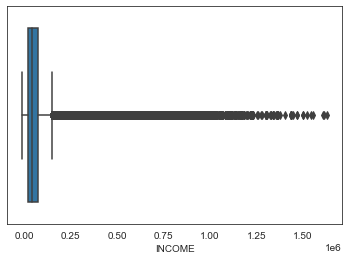

In [41]:
sns.boxplot(x=df.INCOME)


In [21]:
df.INCOME.describe()

count    1.659727e+06
mean     6.058823e+04
std      7.691692e+04
min     -1.020000e+04
25%      2.100000e+04
50%      4.024000e+04
75%      7.200000e+04
max      1.629000e+06
Name: INCOME, dtype: float64

In [22]:
df.INCOME

0           63000
2            2000
4            6000
11           3200
13            500
            ...  
3239548    150000
3239549     27000
3239550     75000
3239551     57000
3239552     55000
Name: INCOME, Length: 1659727, dtype: int64

In [23]:
df[df.INCOME > 100]['INCOME'].describe()

count    1.656282e+06
mean     6.071761e+04
std      7.694438e+04
min      1.040000e+02
25%      2.100000e+04
50%      4.050000e+04
75%      7.200000e+04
max      1.629000e+06
Name: INCOME, dtype: float64

In [24]:
df.SALARY.describe()

count    1.659727e+06
mean     5.189937e+04
std      6.724644e+04
min      0.000000e+00
25%      1.450000e+04
50%      3.540000e+04
75%      6.500000e+04
max      7.170000e+05
Name: SALARY, dtype: float64

In [25]:
df.EDUCATION.value_counts()

21    378817
16    342093
19    250254
22    166793
20    154487
18    120758
17     56487
23     42571
24     29033
15     26173
14     23779
1      15897
13     15039
12     12130
9       8507
11      8136
10      2418
8       1794
6       1670
7       1112
5        797
4        423
2        298
3        261
Name: EDUCATION, dtype: int64

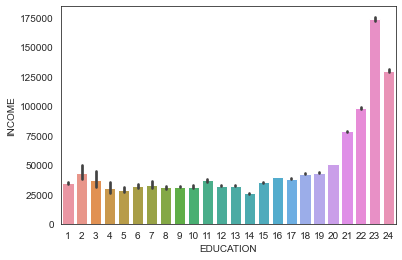

In [42]:
sns.barplot(data=df, x='EDUCATION', y='INCOME')

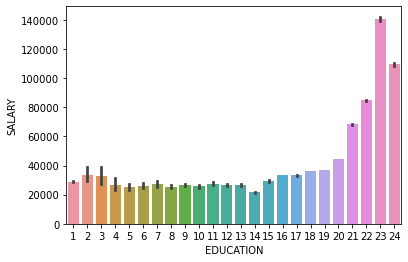

In [27]:
sns.barplot(data=df, x='EDUCATION', y='SALARY')

In [28]:
df['TARGET'] = np.where(df.INCOME > 65000, '>65k', '<=65k')

In [57]:
df.OCCUPATION.sort_values().unique()

array([  10,   20,   40,   51,   52,   60,  101,  102,  110,  120,  135,
        136,  137,  140,  150,  160,  205,  220,  230,  300,  310,  335,
        340,  350,  360,  410,  420,  425,  440,  500,  510,  520,  530,
        540,  565,  600,  630,  640,  650,  700,  705,  710,  725,  726,
        735,  750,  800,  810,  820,  830,  845,  850,  860,  900,  910,
        930,  940,  960, 1005, 1006, 1007, 1010, 1021, 1022, 1031, 1032,
       1050, 1065, 1105, 1106, 1108, 1200, 1220, 1240, 1305, 1306, 1310,
       1320, 1340, 1350, 1360, 1400, 1410, 1420, 1430, 1440, 1450, 1460,
       1520, 1530, 1541, 1545, 1551, 1555, 1560, 1600, 1610, 1640, 1650,
       1700, 1710, 1720, 1745, 1750, 1760, 1800, 1821, 1822, 1825, 1840,
       1860, 1900, 1910, 1920, 1935, 1970, 1980, 2001, 2002, 2003, 2004,
       2005, 2006, 2011, 2012, 2013, 2014, 2015, 2016, 2025, 2040, 2050,
       2060, 2100, 2105, 2145, 2170, 2180, 2205, 2300, 2310, 2320, 2330,
       2350, 2360, 2400, 2435, 2440, 2545, 2555, 26

In [ ]:
np.select

In [38]:
df.TARGET.value_counts()

<=65k    1183289
>65k      476438
Name: TARGET, dtype: int64

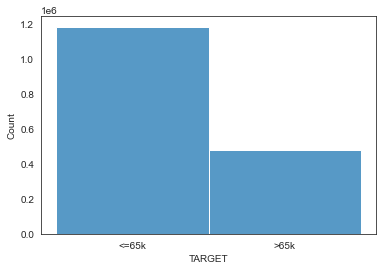

In [43]:
sns.histplot(data = df, x="TARGET")
plt.show()

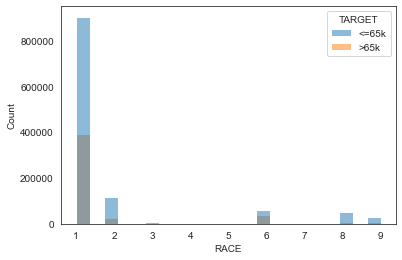

In [44]:
sns.histplot(data = df, x="RACE", hue = "TARGET")
plt.show()

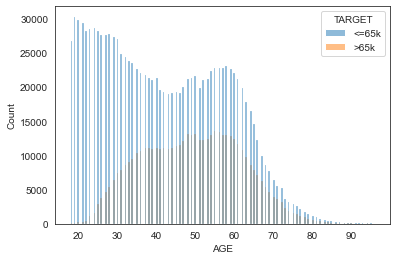

In [45]:
sns.histplot(data = df, x="AGE", hue = "TARGET")
plt.show()

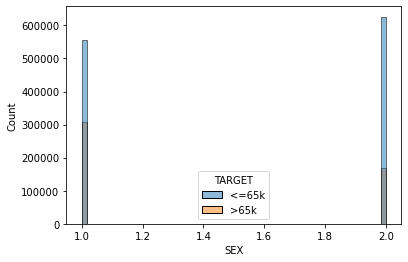

In [36]:
sns.histplot(data = df, x="SEX", hue = "TARGET")
plt.show()

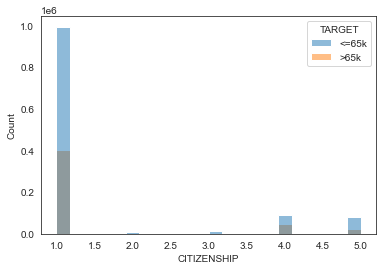

In [51]:
sns.histplot(data = df, x="CITIZENSHIP", hue = "TARGET")
plt.show()

In [46]:
df.SEX.unique()

array([1, 2], dtype=int64)

In [50]:
# sns.histplot(data = df, x="POB_WORLD", hue = "TARGET_60")

In [ ]:
sns.boxplot(x=df.SALARY)


In [ ]:
df.INCOME.median()

In [ ]:
df.SALARY.median()

In [79]:
# Removed work_industry because it was causing an error when running model because because letters in values. Also, occupation might be a more relavent variable

X = df.drop(['TARGET','INCOME', 'SALARY', 'SERIALNO', 'PERSON_NO', 'WORK_INDUSTRY'], axis=1)
y = df.TARGET

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [82]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [84]:
accuracy_score(y_test, y_pred)

0.7600305592241621

In [93]:
importance = tree.feature_importances_
feat_imp_dict = dict(zip(X.columns, importance))

In [95]:
feat_imp_dict

{'FNLWGT': 0.10715639725903969,
 'WGTP': 0.10790733322403659,
 'WKLY_HRS': 0.1035133089223577,
 'AGE': 0.13749461028716176,
 'MOM': 0.003788397334735479,
 'DIS': 0.0068456575254557195,
 'WORK_CLASS': 0.02958348067756729,
 'COUPLE': 0.01788199045415073,
 'ADJINC': 0.0,
 'CITIZENSHIP': 0.007204315885380325,
 'POB_DETAIL': 0.10340609904431292,
 'PARTNER': 0.006581352870214386,
 'SEX': 0.019521497867270927,
 'RACE': 0.016629172805834702,
 'EDUCATION': 0.07900191608879968,
 'OCCUPATION': 0.253484469753682}

In [77]:
df.WORK_INDUSTRY.unique()

array(['23', '611M1', '722Z', '337', '56173', '447', '92M1', '928110P7',
       '5121', '623M', '928110P1', '4481', '928110P4', '928110P3',
       '42393', '7224', '5412', '44511', '713Z', '813M', '32711', '6111',
       '3256', '4441Z', '622M', '531M', '561M', '51912', '3MS', '5241',
       '8131', '5417', '443142', '493', '3352', '336M', '928110P2',
       '8121M', '721M', '111', '2211P', '4411', '6243', '8111Z', '6244',
       '442', '4244', '5616', '4511M', '611M3', '443141', '44512',
       '45221', '712', '115', '5613', '331M', '3231', '611M2', '488',
       '92MP', '5416', '3272', '6214', '3121', '484', '45121', '5617Z',
       '112', '6241', '5614', '6216', '5411', '446Z', '4MS', '483', '492',
       '6231', '311M2', '8123', '51111', '812111', '52M2', '6211', '5615',
       '4539', '52M1', '814', '811192', '5419Z', '71395', '4531', '44611',
       '6222', '44821', '3365', '311S', '6242', '4452', '7211', '621M',
       '4533', '4523', '4236', '45322', '562', '9211MP', '3391', '3